In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [2]:
S = 100
K = 100 # strike
T = 1 # time to maturity
t = 0
r = 0.05 # risk free risk in annual %
sigma = 0.16 # annual volatility in %
steps = 252 # time steps
N = 10000 # number of trials ("Antal aktier")

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def geo_paths(S,T,t,r,sigma,steps,N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = (T-t)/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.insert(np.cumsum(((r - sigma**2/2)*dt + sigma*np.sqrt(dt) * np.random.normal(size=(steps,N))),axis=0),0,0,axis=0)
    
    return np.exp(ST)

paths= geo_paths(S,T,t,r,sigma,steps,N)

GBM_paths = np.transpose(paths)

In [4]:
times = np.linspace(0, T, (steps*T) + 1)[::-1]

def BS_call_price(sigma, S, K, r, delta_T):
    #Danner d1 og d2:
    #d1: Sandsynligheden for, at optionen ender ITM under det ækvivalente martingalmål med det underliggende aktiv som numeraire
    d1 = np.multiply(1. / (sigma*np.sqrt(times)),(np.log(GBM_paths/K) + (r + sigma**2 / 2) * (times)))
                                    
    #d2: Sandsynligheden for, at optionen ender ITM under det ækvivalente martingalmål med den risikofrie obligation som numeraire
    d2 = d1 - sigma * np.sqrt((times))
    
    #Udregner vores Call-pris:
    call = np.multiply(norm.cdf(d1),GBM_paths) - np.multiply(norm.cdf(d2) * K, np.exp(-r * (times)))
    
    return call, d1, d2
call_pxs, d1, d2 = BS_call_price(sigma, GBM_paths, K, r, times)

In [5]:
import matplotlib
matplotlib.rc('xtick', labelsize =22)
matplotlib.rc('ytick', labelsize =22)

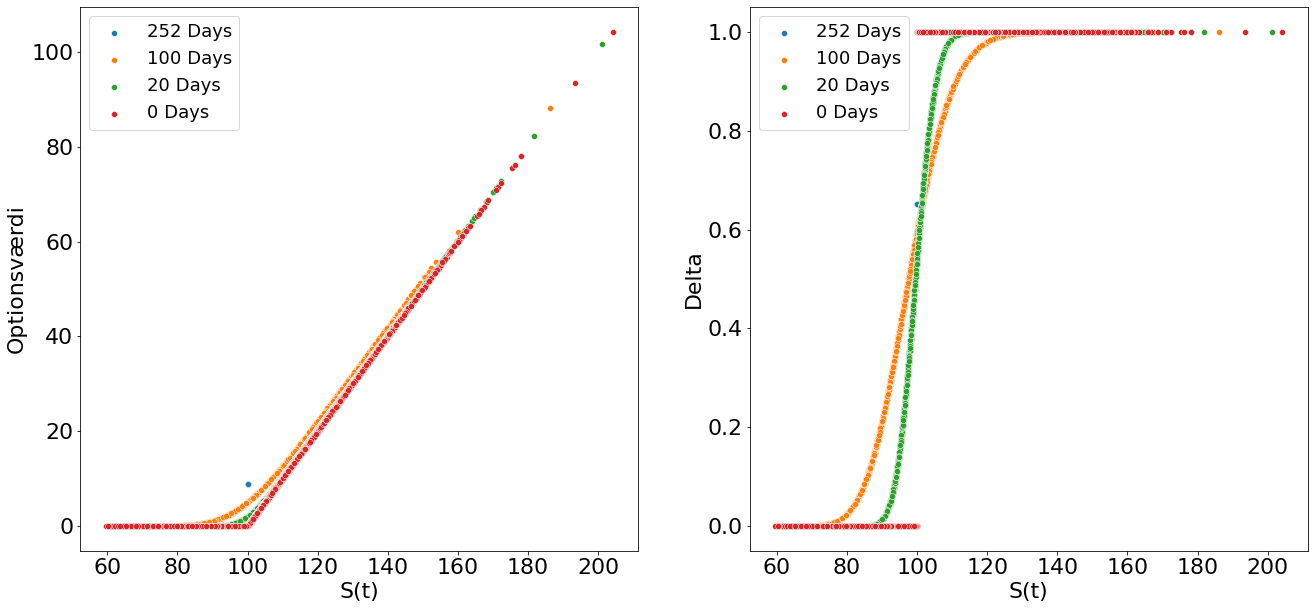

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(22, 10))
axes = axes.reshape(-1)

ts = [-253, -101, -21, -1]

for t in ts:
    
    prices = GBM_paths[:,t]
    call_prices = call_pxs[:,t]
    call_deltas = stats.norm.cdf(d1)[:,t]
    
    sns.scatterplot(prices, call_prices, ax=axes[0], label="{} Days".format(-t-1))
    sns.scatterplot(prices, call_deltas, ax=axes[1], label="{} Days".format(-t-1))

axes[0].set_xlabel('S(t)', fontsize=22)
axes[0].set_ylabel('Optionsværdi', fontsize=22)
axes[0].legend(fontsize=18)

axes[1].set_xlabel('S(t)', fontsize=22)
axes[1].set_ylabel('Delta', fontsize=22)
axes[1].legend(fontsize=18);